# Road Trip - McDonalds

The tweet that started it all:

In [16]:
%%html
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">I wonder how many McDonald&#39;s we&#39;ve passed on our way North... <a href="https://twitter.com/hashtag/ATXtoMSP?src=hash&amp;ref_src=twsrc%5Etfw">#ATXtoMSP</a></p>&mdash; ️️Ryan Larson (@ryan_p_larson) <a href="https://twitter.com/ryan_p_larson/status/1075837060219629568?ref_src=twsrc%5Etfw">December 20, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

---

We'll be using 
- [Pandas](github.com/pandas) for data manipulation
- [GeoPandas](github.com/geopandas) for geographic information
- [GPXPy]() for transforming Google Maps directions into GPS points

To start we'll import our libraries and assign our data files to variables.

In [1]:
# Warnings
#from warnings import filterwarnings
#filterwarnings('error')

# Libraries
import pandas as pd
import geopandas as gpd
import gpxpy
from shapely.geometry import Point, LineString

import matplotlib.pyplot as plt
%matplotlib inline

/home/user/.miniconda3/envs/maps/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/user/.miniconda3/envs/maps/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Data files
states_f = 'data/states.geo.json'
mcdons_f = 'data/Mcdonalds_USA_CAN.csv'
direct_f = 'data/directions.gpx'

### States Map Files

Filter down to just road trip states.

Index(['GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry'], dtype='object')


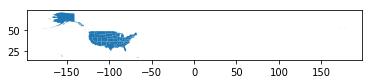

In [3]:
states = gpd.read_file(states_f)

# Take a look at the columns
print (states.columns)

# And make sure it's the U.S.
states.plot();

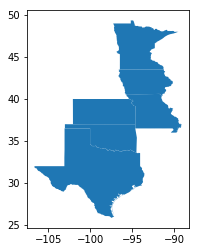

In [4]:
# List of states
road_trip_state_names = ["Texas", "Oklahoma", "Kansas", "Missouri", "Iowa", "Minnesota"]

# Filter just the states we pass through
road_trip_states = states[states.NAME.isin(road_trip_state_names)]

# Plot to double check
road_trip_states.plot();

### McDonalds Locations

In [5]:
# Assign columns to file
csv_cols = ["lng", "lat", "name", "address"]
mcdons = pd.read_csv(mcdons_f, names=csv_cols, header=None)

mcdons.head()

,lng,lat,name,address
0,-149.858384,61.217550,"McDonalds-Anchorage,AK","1166 North Muldoon Road [Glenn Hwy], Anchorage..."
1,-149.857960,61.108444,"McDonalds-Anchorage,AK","1320 Huffman Rd, Anchorage,AK, (907) 345-5932|..."
2,-149.732706,61.221371,"McDonalds-Anchorage,AK","255 Muldoon Rd, Anchorage,AK, (907) 337-0810|S..."
3,-149.832372,61.181187,"McDonalds-Anchorage,AK","2601 E Tudor Rd, Anchorage,AK, (907) 562-2108|..."
4,-149.823633,61.219353,"McDonalds-Anchorage,AK","3006 Mountain View Dr, Anchorage,AK, (907) 274..."


In [6]:
# Take a look at the Names to see if we can assign states
mcdons.name.head(10)

0              McDonalds-Anchorage,AK
1              McDonalds-Anchorage,AK
2              McDonalds-Anchorage,AK
3              McDonalds-Anchorage,AK
4              McDonalds-Anchorage,AK
5    McDonalds PlayPlace-Anchorage,AK
6         McDonalds [WM]-Anchorage,AK
7    McDonalds PlayPlace-Anchorage,AK
8    McDonalds PlayPlace-Anchorage,AK
9              McDonalds-Anchorage,AK
Name: name, dtype: object

In [7]:
# Add state column to mcdonalds locations
mcdons['state'] = mcdons.name.apply(lambda nm: nm.split(',')[-1])

# Filter locations to those within the road trip states
mcdons_road_trip_abbrvs = ['TX', 'OK', 'KS', 'MO', 'IA', 'MN']

# Filtered
road_trip_mcdons = mcdons[mcdons.state.isin(mcdons_road_trip_abbrvs)]
print ("Number of McDonald's in states we drove through: **{}**".format(len(road_trip_mcdons.index)))

# Create a geodataframe of mcdonalds locations
mcdons_geometry = [Point(xy) for xy in zip(road_trip_mcdons.lng, road_trip_mcdons.lat)]
road_trip_mcdons = gpd.GeoDataFrame(road_trip_mcdons, geometry=mcdons_geometry)

road_trip_mcdons.head(10)

Number of McDonald's in states we drove through: **2246**


,lng,lat,name,address,state,geometry
3914,-94.236370,43.082950,"McDonalds-Algona,IA","1321 Highway 169 N, Algona,IA, (515) 295-2870|...",IA,POINT (-94.23636999999999 43.08295)
3915,-93.498037,41.658652,"McDonalds PlayPlace-Altoona,IA","3215 Adventureland Dr, Altoona,IA, (515) 967-3...",IA,POINT (-93.498037 41.658652)
3916,-93.507130,41.643600,"McDonalds-Altoona,IA","3734 8th St SW, Altoona,IA 50009, (515) 957-82...",IA,POINT (-93.50713 41.6436)
3917,-93.610530,42.022500,"McDonalds-Ames,IA","129 S Duff Ave, Ames,IA, (515) 232-1234|Servic...",IA,POINT (-93.61053000000001 42.0225)
3918,-93.665790,42.022970,"McDonalds-Ames,IA","3621 Lincoln Way, Ames,IA, (515) 292-5200|Serv...",IA,POINT (-93.66579 42.02297)
3919,-93.610165,42.016791,"McDonalds [WM]-Ames,IA","534 S Duff Ave [WM], Ames,IA, (515) 232-0171|S...",IA,POINT (-93.61016500000001 42.016791)
3920,-91.264979,42.104313,"McDonalds-Anamosa,IA","160 Chamber Dr, Anamosa,IA, (319) 462-3589|Ser...",IA,POINT (-91.264979 42.104313)
3921,-93.581550,41.704640,"McDonalds PlayPlace-Ankeny,IA","2502 Se Delaware Ave, Ankeny,IA, (515) 965-554...",IA,POINT (-93.58154999999999 41.70464)
3922,-93.620830,41.703840,"McDonalds-Ankeny,IA","2625 SW State St, Ankeny,IA 50021, (515) 289-1...",IA,POINT (-93.62083 41.70384)
3923,-93.599870,41.727540,"McDonalds-Ankeny,IA","401 S Ankeny Blvd, Ankeny,IA, (515) 964-5001|S...",IA,POINT (-93.59987 41.72754)


### Directions from GPX Tracks

In [8]:
with open(direct_f, 'r') as f:
    gpx = gpxpy.parse(f)

# All information is within one track/segment
directs = gpx.tracks[0].segments[0].points

In [9]:
# Create a dataframe from the GPX gps points
directs_pts = pd.DataFrame([{'lat': pt.latitude, 'lon': pt.longitude} for pt in directs])
directs_pts.head()

,lat,lon
0,30.23034,-97.78807
1,30.23055,-97.78852
2,30.23085,-97.78913
3,30.23094,-97.78932
4,30.23118,-97.78982


In [10]:
# Create line from points
directs_geometry = [Point(xy) for xy in zip(directs_pts.lon, directs_pts.lat)]
directs_line = gpd.GeoSeries(LineString(directs_geometry))

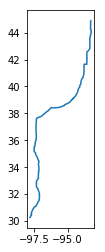

In [11]:
# Double check our GPX directions line
directs_line.plot();

### Geometric Manipulations!

It doesn't matter at what longitude you are. What matters is what latitude you are.

Length of 1 degree of Longitude = cosine (latitude in decimal degrees) * length of degree (miles) at equator.

Convert your latitude into decimal degrees ~ 37.26383

Convert your decimal degrees into radians ~ 0.79863

1 degree of Longitude = ~0.79863 * 69.172 = ~ 55.2428 miles

In [12]:
# add a 1 mile buffer to the directions
buffered_directions = directs_line.buffer(0.0175)

# Intersect the road trip mcdonalds with the buffered directions
road_trip_mcdons['intersects'] = road_trip_mcdons['geometry'].apply(lambda pt: buffered_directions.intersects(pt))

# ???

# profit
road_trip_mcdons['intersects'].value_counts()


False    2149
True       97
Name: intersects, dtype: int64

### Reprojecting all into Albers

In [13]:
# States are already init
road_trip_states.to_crs(epsg=2163, inplace=True)

# McDonalds - Init + set
road_trip_mcdons.crs = {'init': 'epsg:4326'}
road_trip_mcdons.to_crs(epsg=2163, inplace=True)

# Directions - Geodataframe + init + set
directs_df = gpd.GeoDataFrame(directs_line, geometry=directs_line)
directs_df.crs = {'init': 'epsg:4326'}
directs_df.to_crs(epsg=2163, inplace=True)

/home/user/.miniconda3/envs/maps/lib/python3.5/site-packages/geopandas/geodataframe.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[geo_column_name] = level


### Label Centroids

In [14]:
# Get state labels + points
road_trip_states['center'] = road_trip_states['geometry'].centroid
road_trip_states['rep'] = road_trip_states['geometry'].representative_point()

state_labels = road_trip_states.copy()
state_labels.set_geometry('rep', inplace=True)

# Add abbreviations to state names
name_to_abbrv = {
    'Texas': 'TX',
    'Oklahoma': 'OK',
    'Minnesota': 'MN',
    'Iowa': 'IA',
    'Missouri': 'MO',
    'Kansas': 'KS'
}
state_labels['abbrv'] = state_labels.NAME.apply(lambda nm: name_to_abbrv[nm])

/home/user/.miniconda3/envs/maps/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/.miniconda3/envs/maps/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Plotting

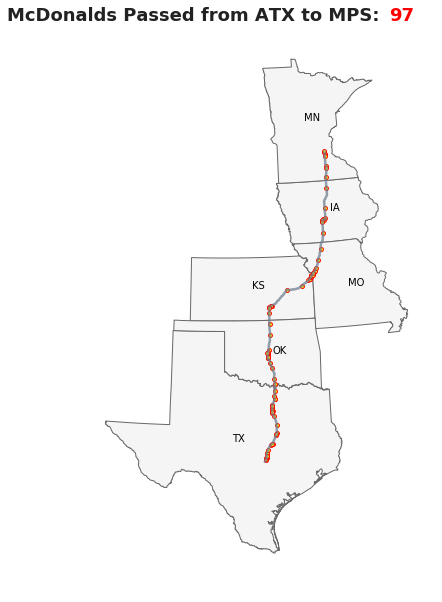

In [69]:
############ Init
fig, ax = plt.subplots(1, figsize=(10, 10))


########### Plot layers!
# States
road_trip_states.plot(ax=ax, facecolor='whitesmoke', edgecolor='dimgrey')

# Labels
for x, y, name in zip(state_labels.geometry.x, state_labels.geometry.y, state_labels.abbrv):
    plt.text(x, y, name, fontsize=10)

# Directions
directs_df.plot(ax=ax, color='slategrey', alpha=0.75, linewidth=2.5)

# McDonalds
road_trip_mcdons[road_trip_mcdons['intersects'] == True].plot(ax=ax, color='yellow', edgecolor='red', markersize=15)


#################### Plot clean
# remove border
ax.set_axis_off()

# Map title
ax.text(-0.25, 1.05, 'McDonalds Passed from ATX to MPS:',
          family='Roboto Bold',
          weight='semibold',
          color='#222222',
          size=18,
          va='top',
          ha='left',
          transform=ax.transAxes,
          bbox={
              'boxstyle': 'square',
              'ec': 'white',
              'fc': 'white',
              'pad': 0.5,
              'alpha': 0.5
          })

# Map title
ax.text(0.9, 1.05, '97',
          family='Roboto Bold',
          weight='semibold',
          color='red',
          size=18,
          va='top',
          ha='left',
          transform=ax.transAxes,
          bbox={
              'boxstyle': 'square',
              'ec': 'white',
              'fc': 'white',
              'pad': 0.25,
              'alpha': 0.5
          })

# show
#plt.tight_layout();
plt.savefig('./road-trip-mcdonalds.png', facecolor='white', bbox_inches='tight', pad_inches=0.15, dpi=108)